# Clasiffication

Libraries

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score

<font size="5">Defining the training path</font>

In [ ]:
#Puede marcar error por encontrar el archivo .Ds_Store, 
#en mac se elimina con el siguiente comando ejecutado en la carpeta segmented
#find . -name ".DS_Store" -delete

train_path = "/Users/HARRYS SYSTEM PC/Documents/Prueba_vision_output_handSaved"
class_names = os.listdir(train_path)
print(class_names)

['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

image_paths=[]
image_classes=[]

<font size="5">Function to list all the filenames In the directory</font>

In [3]:
def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

for training_name in class_names:
    dir_=os.path.join(train_path,training_name)
    class_path=img_list(dir_)
    image_paths+=class_path
    
len(image_paths)


# Suponiendo que class_names ya contiene los nombres de tus clases, es decir, ['J','K','L','M','N','O','P','Q','R']
# y que image_paths ya contiene las rutas a todas tus imágenes.

# Crear un diccionario para mapear nombres de clases a etiquetas numéricas
class_to_label = {class_name: i for i, class_name in enumerate(class_names)}

# Iterar sobre las rutas de imagen y asignar etiquetas basadas en la subcarpeta en la que se encuentran
for image_path in image_paths:
    class_name = os.path.basename(os.path.dirname(image_path))
    label = class_to_label[class_name]
    image_classes.append(label)



<font size="5">Append all the image path and its corresponding labels in a list</font>


In [4]:
D=[]
for i in range(len(image_paths)):
    D.append((image_paths[i],image_classes[i]))

<font size="5">Shuffle Dataset and split into Training and Testing</font>


In [5]:
dataset = D
random.shuffle(dataset)
train = dataset[:2000]
test = dataset[400:]

image_paths, y_train = zip(*train)
image_paths_test, y_test = zip(*test)

<font size="5">Feature Extraction using ORB</font>


/Users/HARRYS SYSTEM PC/Documents/Prueba_vision_output_handSaved2\B\Hand_B (1949).jpg


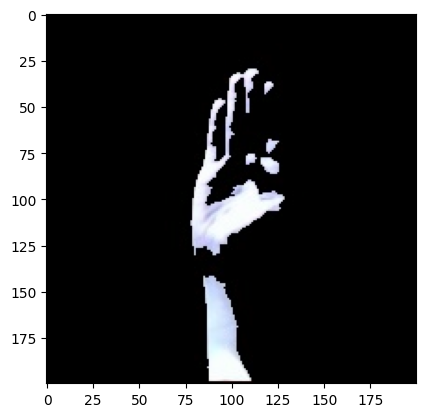

In [6]:
des_list=[]
orb=cv2.ORB_create()
im=cv2.imread(image_paths[2])
print(image_paths[2])
plt.imshow(im)

<font size="5">Function for plotting keypoints</font>


In [7]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

<font size="5">Plotting the keypoints</font>


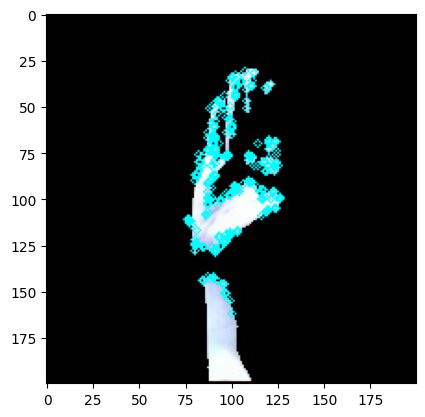

In [8]:
kp = orb.detect(im,None)
kp, des = orb.compute(im, kp)
img=draw_keypoints(im,kp)

<font size="5">Appending descriptors of the training images in list</font>


In [9]:
for image_pat in image_paths:
    im=cv2.imread(image_pat)
    kp=orb.detect(im,None)
    keypoints,descriptor= orb.compute(im, kp)
    des_list.append((image_pat,descriptor))
    
descriptors=des_list[0][1]
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

#descriptors.shape
print(descriptors.shape)

descriptors_float=descriptors.astype(float)

(46459, 32)


<font size="5">Performing K Means clustering on Descriptors</font>

In [10]:
from scipy.cluster.vq import kmeans,vq

k=9
voc,variance=kmeans(descriptors_float,k,1)

<font size="5">Creating histogram of training image</font>

In [11]:
im_features=np.zeros((len(image_paths),k),"float32")
for i in range(len(image_paths)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1

<font size="5">Applying standardisation on training feature</font>

In [12]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)

<font size="5">Creating Classification Model with SVM</font>

In [13]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))

C:\Users\HARRYS SYSTEM PC\.conda\envs\vision\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(max_iter=80000)

<font size="5">Testing the Classification Model with SVM</font>

In [14]:
des_list_test=[]

for image_pat in image_paths_test:
    image=cv2.imread(image_pat)
    kp=orb.detect(image,None)
    keypoints_test,descriptor_test= orb.compute(image, kp)
    des_list_test.append((image_pat,descriptor_test))
    
#len(image_paths_test)
#print(len(image_paths_test))

from scipy.cluster.vq import vq
test_features=np.zeros((len(image_paths_test),k),"float32")
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

test_features

test_features=stdslr.transform(test_features)

# Suponiendo que las etiquetas numéricas van de 0 a 8 para las letras ['J','K','L','M','N','O','P','Q','R']
#label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I'}

#Para ASL completo

label_map = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H',
    8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O',
    15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V',
    22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}

"""

# Mapeo de etiquetas verdaderas
true_classes = [label_map[i] for i in y_test]

# Mapeo de predicciones
predict_classes = [label_map[i] for i in clf.predict(test_features)]

In [15]:
print(true_classes)

['B', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'A', 'A',

In [16]:
print(predict_classes)

['B', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'A', 'A',

In [17]:
clf.predict(test_features)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [18]:
accuracy=accuracy_score(true_classes,predict_classes)
print(accuracy)

0.9351351351351351
